In [6]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

# Task1

Решим уравнение
$1 + cosx = 0$
с помощью метода простой итерации
$x_{k+1} = x_k + \frac{cos(x_k) + 1}{sin(x_k)}$

In [4]:
def simple_iter(x):
    return x + (np.cos(x) + 1)/np.sin(x)

In [6]:
n = 10
x = np.zeros(n)
x[0] = 1
for i in range(1, n):
    x[i] = simple_iter(x[i-1])
x

array([1.        , 2.83048772, 2.98730706, 3.06460325, 3.10311698,
       3.12235719, 3.13197522, 3.13678397, 3.13918832, 3.14039049])

Построим ошибку

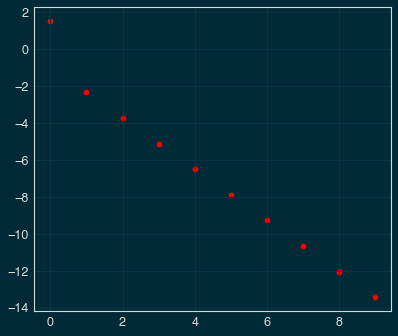

In [25]:
jtplot.style(theme='solarizedd')
plt.scatter(range(n), np.log((x - np.pi)**2), color='red')
plt.show()

Видно, что сходимость линейнейная.

Теперт решим второе уравнени $$x^2 = 2$$ с помощью формулы 
$$x_{k+1} = \frac{1}{2}(x_k + \frac{2}{x_k})$$

In [33]:
def simple_iter(x):
    return 0.5*(x + 2/x)

In [34]:
n = 10
x = np.zeros(n)
x[0] = 1
for i in range(1, n):
    x[i] = simple_iter(x[i-1])
x

array([1.        , 1.5       , 1.41666667, 1.41421569, 1.41421356,
       1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356])

Построим ошибку

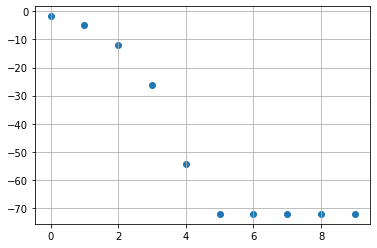

In [35]:
plt.scatter(range(n), np.log((x - 2**0.5)**2))
plt.grid()
plt.show()

Видно, что зависимость не линейная, а скорее квадратичная.

# Task2

In [25]:
def simple_iteration(f, fder, x):
    return x - f(x)/fder(x)

def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Newton's root finding method for f(x)=0
    Parameters
    ----------
    f : callable
        Function f.
    fder : callable
        Derivative of f.
    x0 : float
        Initial point for iterations.
    eps : float
        Requested accuracy.
    maxiter : int
        Maximal number of iterations.
    
    Returns
    -------
    x : float
        Approximate root.
    niter : int
        Number of iterations.
    """
    x = [x0]
    x.append(simple_iteration(f, fder, x0))
    niter = 1
    while abs((x[niter] - x[niter-1])) > eps and (niter < maxiter):
        x.append(simple_iteration(f, fder, x[niter]))
        niter += 1
    return np.array(x), niter

In [26]:
def fun(x):
    return x**2 - 2
def dfun(x):
    return 2*x

In [27]:
x, itter = newton_iteration(fun, dfun, 2)

In [28]:
len(x), itter

(5, 4)

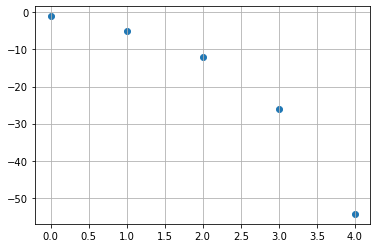

In [31]:
plt.scatter(range(len(x)), np.log((x - 2**0.5)**2))
plt.grid()
plt.show()

Видно, что сходимость квадратичная, и что она совпадает с пунктом 2 первого задания, что и стоило ожидать, ведь мы делаем тоже самое.

# Task3

Сначала немного разберемся в sympy

In [2]:
import sympy

In [3]:
x1, x2 = sympy.symbols('x1 x2')

In [4]:
a1 = x1**2-2*x2**4 +1
a1

x1**2 - 2*x2**4 + 1

In [5]:
a2 = x1-x2**3 +1
a2

x1 - x2**3 + 1

In [6]:
f = sympy.Matrix([a1, a2])

In [7]:
J = f.jacobian(sympy.Matrix([x1, x2]))
J

Matrix([
[2*x1, -8*x2**3],
[   1, -3*x2**2]])

In [8]:
J

Matrix([
[2*x1, -8*x2**3],
[   1, -3*x2**2]])

In [26]:
J.subs({x1: 2, x2: 1}) #проверяем, все ли работает как надо

Matrix([
[4, -8],
[1, -3]])

In [10]:
np.array(J)

array([[2*x1, -8*x2**3],
       [1, -3*x2**2]], dtype=object)

In [11]:
Ji = J.inv()
Ji

Matrix([
[         3/(6*x1 - 8*x2),        -4*x2/(3*x1 - 4*x2)],
[1/(6*x1*x2**2 - 8*x2**3), -x1/(3*x1*x2**2 - 4*x2**3)]])

In [27]:
def simple_iteration(x0): #итерации через обратный якобиан
    return x0 - np.squeeze(np.array((Ji @ f).subs({x1: x0[0], x2: x0[1]})))

In [28]:
def iteration_solver(x0): #итерации через решение системы линейных уравнений
    M = np.array(J.subs({x1: x0[0], x2: x0[1]}), dtype='float32')
    b = np.squeeze(np.array(f.subs({x1: x0[0], x2: x0[1]}), dtype='float32'))
    return np.linalg.solve(M, - b) + x0

In [14]:
simple_iteration([0, 1])

array([-3/8, 7/8], dtype=object)

In [15]:
iteration_solver([0, 1])

array([-0.375,  0.875])

Проверили, что два метода дают один и тот же результат, но алгоритмы решения систем линейных уравнений более продвинутые, эффективные, поэтому будем пользоваться ими.

In [23]:
vec = []
x0 = [0, 1]
v0 = iteration_solver(x0)
vec.append(v0)
for i in range(10):
    vec.append(iteration_solver(vec[i]))

In [24]:
f.subs({x1: vec[-1][0], x2: vec[-1][1]})

Matrix([
[-4.44089209850063e-16],
[                    0]])

Мы действительно нашли решение

In [25]:
print('Решением системы:', vec[-1])

Решением системы: [-0.35119943  0.86570596]


# Task 4

Есть система уравнений $Ax = b$

Перепишем матрицу А в сумму диагональной и бездиагональной: $A = D + (A-D)$

Тогда уравнение можно переписать $Dx +Ax -Dx = b$

Или в итерационной форме

$x_{n+1} = D^{-1}(D-A)x{n} + D^{-1}b$

То есть в виде $x_{n+1} = Bx{n} + c$, где $B = D^{-1}(D-A), c = D^{-1}b$

P.S. 
Мне кажется в условии ошибка и в скобках должно быть D - A, а не наоборот.

In [7]:
rnd = np.random.RandomState(1234)
n = 10
A = rnd.uniform(size=(n, n)) + np.diag([15]*n)
b = rnd.uniform(size=n)

In [8]:
D = np.array([A[i,i] for i in range(len(A))])
B = np.diag(D**-1) @ (np.diag(D) - A)
c = np.diag(D**-1) @ b
print(np.linalg.norm(B))

0.36436161983015336


In [9]:
def iterations(B, c, epsilon=10**(-16)):
    x0 = np.ones(n)
    x = B @ x0 + c
    count = 1
    while (np.linalg.norm(x - x0) > epsilon) and count < 1000:
        x0 = x
        x = B @ x0 + c
        count += 1
    return x, count

In [10]:
x0, count = iterations(B, c)
x0, count

(array([ 0.03919429,  0.03780037,  0.04283232,  0.02365951,  0.05745031,
        -0.00030244, -0.00577279,  0.03177549, -0.00422849,  0.05284648]),
 33)

In [11]:
A @ x0 - b

array([-1.11022302e-16,  1.11022302e-16, -1.11022302e-16, -1.11022302e-16,
        0.00000000e+00, -1.11022302e-16, -9.71445147e-17, -1.11022302e-16,
       -9.71445147e-17,  0.00000000e+00])

Итерации сходятся, мы получаем правильный ответ.Будем

Однако уже тут видно, что итерация нужно относительно много, что бы получить ответ с хорошей точностью.
Посмотрим, как будет вести себя сходимость, если мы будет делать матрицу менее диагонально выраженной.

Не диагональные элементы матрицы принадлежат диапазону \[0, 1)
На диагональные позиции будем ставить элементы, который равны i, где i прохожит диапазон от 15 (сильно диагонально выраженная) до 1 (не диагональная). 

In [12]:
numbers = []
norms = []
for i in range(15, 1, -1):
    A = rnd.uniform(size=(n, n)) + np.diag([i]*n)
    D = np.array([A[i,i] for i in range(len(A))])
    B = np.diag(D**-1) @ (np.diag(D) - A)
    c = np.diag(D**-1) @ b
    
    numbers.append(iterations(B, c)[1])
    norms.append(np.linalg.norm(B))

Построим график зависимости количества итераций от $\alpha = \frac{1}{i}$.

Чем $\alpha$ меньше, тем более диагонально выраженной она является.

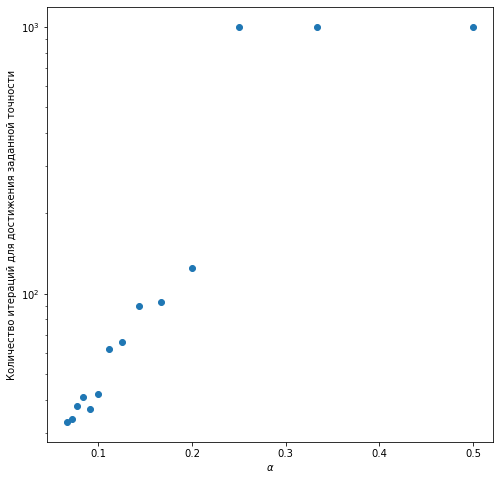

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(1/np.arange(15, 1, -1), numbers)
plt.xlabel(r'$\alpha$')
plt.ylabel('Количество итераций для достижения заданной точности')
plt.yscale('log')
plt.show()

Видно, что в начале количество итерация для получения заданной точности растет экспоненциально, однако когда средний модуль диагонального элемента отличается в 4 раза нужно более 1000 итераций. Для вектора из 10-и элементов это слишком много.

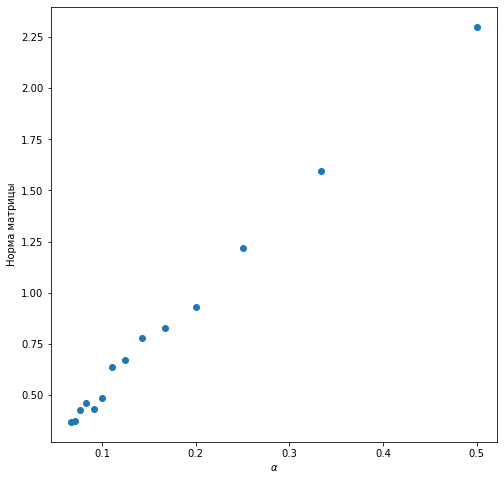

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(1/np.arange(15, 1, -1), norms)
plt.xlabel(r'$\alpha$')
plt.ylabel('Норма матрицы')
#plt.yscale('log')
plt.show()

В зависимости от $\alpha$ норма матрицы растет линейно

# ---------------------------- ---------------------------- ----------------------------
# Черновик (еще не доделано - проверять не надо)



# Task5

$$
\phi''(x)=e^{\phi(x)} - n(x),\quad\textrm{где }n(x)=1+e^{-3(x-5)^2},
$$

в области $0<=x<=10$ с граничными условиями $\phi(0)=\phi(10)=0$. Перепишем уравнения для дискретной системы

$$
G_j=\frac{\phi_{j+1}-2\phi_j+\phi_{j-1}}{\delta x^2} - e^{\phi_j} + n(x_j)=0.
$$

Тогда легко получить 
$$\phi_{j+1} = \delta x^2 (e^{\phi{j}}- 1 - e^{-3(x_j-5)^2)}) + 2 \phi{j} - \phi_{j-1}$$

In [166]:
N = 100
dx2 = (10/N)**2
x = np.linspace(0, 10, N)

phi = np.zeros(N)
phi[1] = dx2 * (2 + np.exp(-3*(x[1] - 5)**2))
phi[1]

0.020000000000000004

In [168]:
A = -2 * np.identity(N) + np.diag(np.ones(N-1), -1) + np.diag(np.ones(N-1), +1)
f0 = np.ones(N)/2

In [178]:
def simple_iter(f0):
    return np.log(-(A @ f0 - np.exp(f0) + np.ones(N) + np.exp(-3*(x - 5)**2)))

In [179]:
simple_iter(f0)

<ipython-input-178-009592b9641f>:2: RuntimeWarning: invalid value encountered in log
  return np.log(-(A @ f0 - np.exp(f0) + np.ones(N) + np.exp(-3*(x - 5)**2)))


array([ 0.13864939, -0.43275213, -0.43275213, -0.43275213, -0.43275213,
       -0.43275213, -0.43275213, -0.43275213, -0.43275213, -0.43275213,
       -0.43275213, -0.43275213, -0.43275213, -0.43275213, -0.43275213,
       -0.43275213, -0.43275213, -0.43275213, -0.43275213, -0.43275213,
       -0.43275213, -0.43275213, -0.43275213, -0.43275213, -0.43275213,
       -0.43275215, -0.4327522 , -0.43275242, -0.43275323, -0.43275612,
       -0.43276572, -0.43279561, -0.43288301, -0.43312273, -0.43373937,
       -0.43522697, -0.4385932 , -0.44574396, -0.46002954, -0.4869604 ,
       -0.53514249, -0.61769461, -0.75508524, -0.98259172, -1.37611895,
       -2.20104067,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, -2.20104067,
       -1.37611895, -0.98259172, -0.75508524, -0.61769461, -0.53514249,
       -0.4869604 , -0.46002954, -0.44574396, -0.4385932 , -0.43522697,
       -0.43373937, -0.43312273, -0.43288301, -0.43279561, -0.43

<ipython-input-178-009592b9641f>:2: RuntimeWarning: invalid value encountered in log
  return np.log(-(A @ f0 - np.exp(f0) + np.ones(N) + np.exp(-3*(x - 5)**2)))


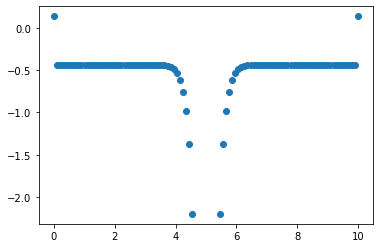

In [180]:
plt.scatter(x, simple_iter(f0))

In [184]:
for i in range(2, N):
    phi[i] = dx2 * (np.exp(phi[i-1]) - 1 - np.exp(-3*(x[i] - 5)**2)) + 2 * phi[i-1] - phi[i-2]

<ipython-input-184-571e11f53448>:2: RuntimeWarning: overflow encountered in exp
  phi[i] = dx2 * (np.exp(phi[i-1]) - 1 - np.exp(-3*(x[i] - 5)**2)) + 2 * phi[i-1] - phi[i-2]
<ipython-input-184-571e11f53448>:2: RuntimeWarning: invalid value encountered in double_scalars
  phi[i] = dx2 * (np.exp(phi[i-1]) - 1 - np.exp(-3*(x[i] - 5)**2)) + 2 * phi[i-1] - phi[i-2]


In [187]:
np.exp(37)

1.1719142372802612e+16

In [185]:
phi

array([0.00000000e+00, 2.00000000e-02, 4.02020134e-02, 6.08142373e-02,
       8.20534761e-02, 1.04147853e-01, 1.27339876e-01, 1.51889929e-01,
       1.78080302e-01, 2.06219888e-01, 2.36649709e-01, 2.69749501e-01,
       3.05945657e-01, 3.45720899e-01, 3.89626222e-01, 4.38295833e-01,
       4.92466079e-01, 5.52999790e-01, 6.20918104e-01, 6.97442773e-01,
       7.84053538e-01, 8.82567633e-01, 9.95252707e-01, 1.12499186e+00,
       1.27553293e+00, 1.45188009e+00, 1.66093863e+00, 1.91263965e+00,
       2.22205006e+00, 2.61372269e+00, 3.13189294e+00, 3.86923610e+00,
       5.07563619e+00, 7.87277384e+00, 3.69082688e+01, 1.06919640e+14,
                  inf,            inf,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
      

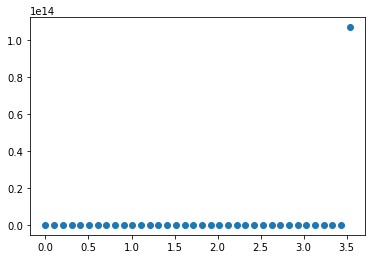

In [186]:
plt.scatter(x, phi)